# 02 - Préparation du Dataset

## Objectifs d'apprentissage

Dans ce notebook, nous allons :
1. **Charger un corpus français** pour l'entraînement de notre Mini-GPT
2. **Prétraiter les données** (nettoyage, filtrage)
3. **Analyser les statistiques** du corpus (taille, vocabulaire, distribution)
4. **Visualiser les caractéristiques** du dataset

## Pourquoi un corpus français ?

Pour ce workshop, nous utilisons un corpus en français pour plusieurs raisons :
- **Pertinence locale** : Démonstration avec une langue que nous maîtrisons
- **Diversité linguistique** : Le français a des caractéristiques intéressantes (accents, genre, conjugaisons)
- **Taille raisonnable** : Un sous-ensemble de Wikipedia-fr permet un entraînement rapide

## Sources de données disponibles

Nous pouvons utiliser plusieurs sources :
1. **Wikipedia-fr** : Articles encyclopédiques (recommandé)
2. **Project Gutenberg** : Littérature classique française
3. **OSCAR** : Corpus web en français

Pour ce workshop de 4 heures, nous limitons à **10,000 lignes** pour un entraînement rapide.

## 1. Configuration et Imports

In [2]:
import sys
import os

# Add src to path for imports
sys.path.append(os.path.abspath('../../src'))
#!pip install -r ../../requirements.txt

In [3]:
from training.config import CorpusConfig
from training.data_loader import (
    load_corpus,
    compute_corpus_statistics,
    visualize_corpus_statistics,
    download_wikipedia_fr
)

import matplotlib.pyplot as plt
import numpy as np

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. Configuration du Corpus

Nous utilisons la classe `CorpusConfig` pour définir les paramètres de chargement :

In [4]:
# Configuration du corpus
corpus_config = CorpusConfig(
    source="../../data/rawwikipedia/french_corpus.txt",
    dataset_name="wikipedia-fr",
    max_lines=10000,  # Limité pour le workshop de 4h
    min_length=10,    # Textes trop courts exclus
    max_length=500,   # Textes trop longs tronqués
    encoding="utf-8",
    
    # Options de prétraitement
    remove_punctuation=False,  # Garder la ponctuation
    lowercase=False,           # Garder les majuscules
    remove_numbers=False       # Garder les nombres
)

print("Configuration du corpus :")
print(f"  Source: {corpus_config.source}")
print(f"  Dataset: {corpus_config.dataset_name}")
print(f"  Max lignes: {corpus_config.max_lines:,}")
print(f"  Longueur min/max: {corpus_config.min_length}/{corpus_config.max_length}")

Configuration du corpus :
  Source: ../../data/rawwikipedia/french_corpus.txt
  Dataset: wikipedia-fr
  Max lignes: 10,000
  Longueur min/max: 10/500


## 3. Téléchargement et Chargement du Corpus

Si le corpus n'existe pas localement, il sera téléchargé automatiquement depuis Wikipedia-fr.

In [5]:
# Charger le corpus (télécharge si nécessaire)
texts = load_corpus(corpus_config)

print(f"\n✓ Corpus chargé avec succès !")
print(f"  Nombre de textes: {len(texts):,}")

Corpus not found at ../../data/rawwikipedia/french_corpus.txt
Creating sample French corpus instead...
✓ Created sample corpus with 1000 lines at ../../data/rawwikipedia/french_corpus.txt
Loading corpus from ../../data/rawwikipedia/french_corpus.txt...
✓ Loaded 1000 texts from corpus

✓ Corpus chargé avec succès !
  Nombre de textes: 1,000


## 4. Exploration du Corpus

Regardons quelques exemples de textes du corpus :

In [6]:
# Afficher les 5 premiers textes
print("Exemples de textes du corpus :\n")
for i, text in enumerate(texts[:5], 1):
    print(f"{i}. {text[:100]}..." if len(text) > 100 else f"{i}. {text}")
    print()

Exemples de textes du corpus :

1. Le chat dort sur le canapé.

2. La tour Eiffel est un monument emblématique de Paris.

3. Les étudiants apprennent à construire des modèles de langage.

4. L'intelligence artificielle transforme notre société.

5. Le soleil brille dans le ciel bleu.



## 5. Statistiques du Corpus

Calculons des statistiques détaillées sur notre corpus :

In [8]:
# Calculer les statistiques
stats = compute_corpus_statistics(texts)

print("=" * 60)
print("STATISTIQUES DU CORPUS")
print("=" * 60)
print(f"\nNombre de textes: {stats['num_texts']:,}")
print(f"Caractères totaux: {stats['total_chars']:,}")
print(f"Longueur moyenne: {stats['avg_length']:.1f} caractères")
print(f"Longueur min: {stats['min_length']} caractères")
print(f"Longueur max: {stats['max_length']} caractères")
print(f"\nTaille du vocabulaire (caractères): {stats['vocab_size']}")
print(f"Nombre total de mots: {stats['word_count']:,}")
print(f"Mots uniques: {stats['unique_words']:,}")
print(f"Ratio mots uniques/total: {stats['unique_words']/stats['word_count']:.2%}")
print("=" * 60)

STATISTIQUES DU CORPUS

Nombre de textes: 1,000
Caractères totaux: 52,100
Longueur moyenne: 52.1 caractères
Longueur min: 27 caractères
Longueur max: 74 caractères

Taille du vocabulaire (caractères): 32
Nombre total de mots: 8,300
Mots uniques: 64
Ratio mots uniques/total: 0.77%


### 5.1 Caractères les plus fréquents

In [9]:
# Top 20 caractères
print("\nTop 20 caractères les plus fréquents :")
print("-" * 40)
for i, (char, freq) in enumerate(list(stats['char_freq'].items())[:20], 1):
    display_char = '␣' if char == ' ' else char
    print(f"{i:2d}. '{display_char}' : {freq:,}")


Top 20 caractères les plus fréquents :
----------------------------------------
 1. '␣' : 7,300
 2. 'e' : 6,100
 3. 'n' : 3,900
 4. 'a' : 3,700
 5. 's' : 3,600
 6. 't' : 3,500
 7. 'r' : 3,300
 8. 'l' : 2,500
 9. 'o' : 2,400
10. 'i' : 2,400
11. 'u' : 2,200
12. 'd' : 1,400
13. 'c' : 1,300
14. 'é' : 1,100
15. 'm' : 1,100
16. 'L' : 1,000
17. 'p' : 1,000
18. '.' : 1,000
19. 'g' : 700
20. 'f' : 600


### 5.2 Mots les plus fréquents

In [10]:
# Top 20 mots
print("\nTop 20 mots les plus fréquents :")
print("-" * 40)
for i, (word, freq) in enumerate(list(stats['word_freq'].items())[:20], 1):
    print(f"{i:2d}. '{word}' : {freq:,}")


Top 20 mots les plus fréquents :
----------------------------------------
 1. 'le' : 400
 2. 'Les' : 400
 3. 'Le' : 300
 4. 'de' : 300
 5. 'chat' : 200
 6. 'sur' : 200
 7. 'La' : 200
 8. 'est' : 200
 9. 'apprennent' : 200
10. 'des' : 200
11. 'dans' : 200
12. 'du' : 200
13. 'sa' : 200
14. 'dort' : 100
15. 'canapé.' : 100
16. 'tour' : 100
17. 'Eiffel' : 100
18. 'un' : 100
19. 'monument' : 100
20. 'emblématique' : 100


## 6. Visualisation des Statistiques

Créons des visualisations pour mieux comprendre notre corpus :

/home/frejus/Projects/laleye/Cours/NLP/mini-gpt-workshop/src/training/data_loader.py:300: UserWarning: Glyph 9251 (\N{OPEN BOX}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/frejus/.virtualenvs/nlp/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9251 (\N{OPEN BOX}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


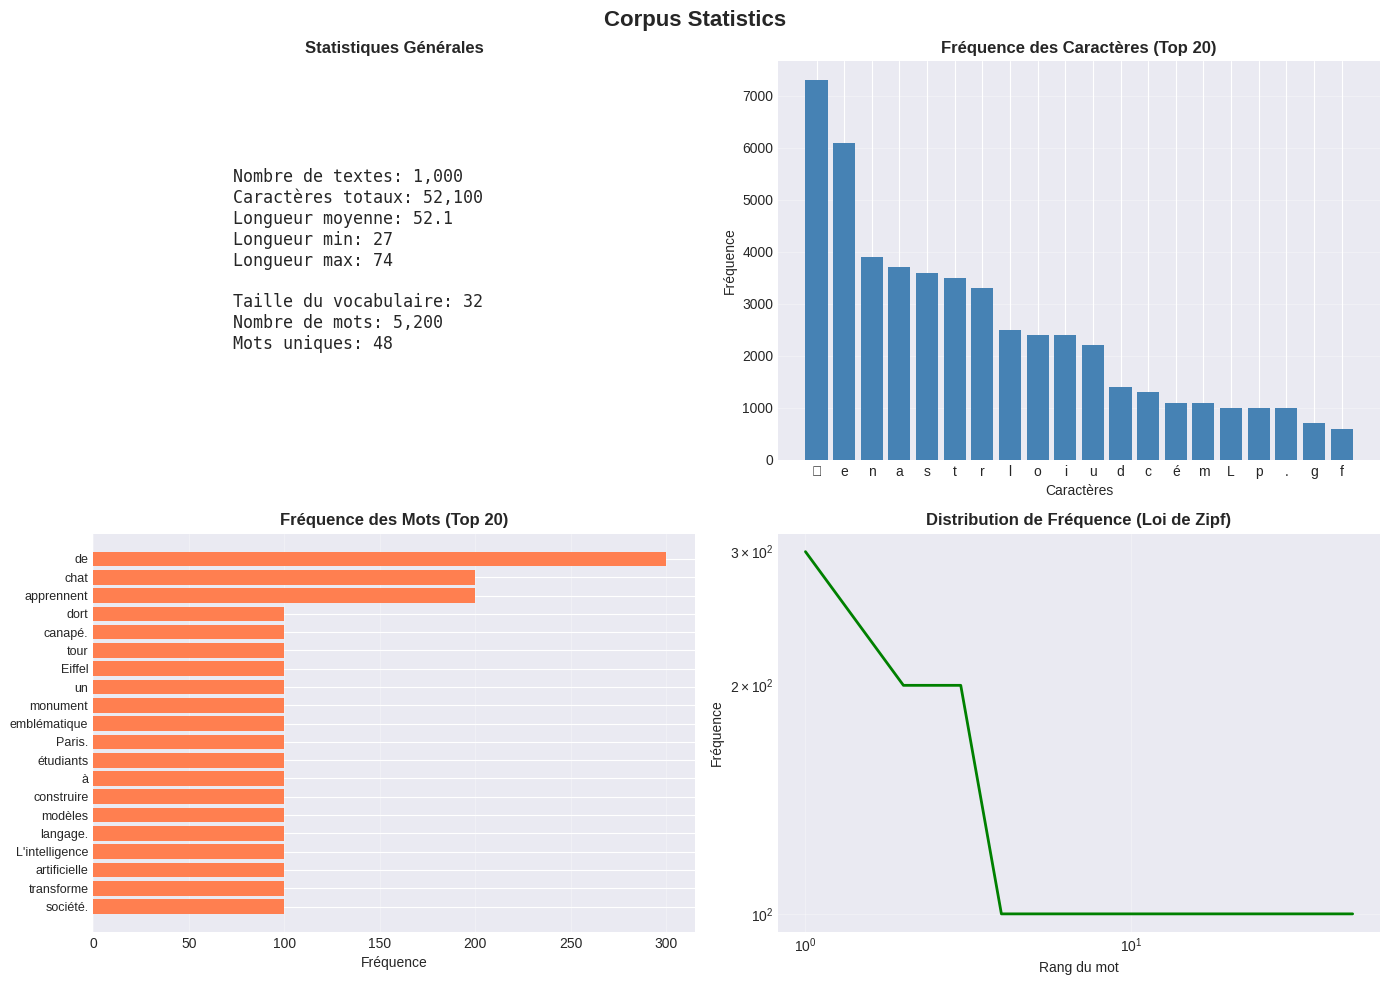

In [12]:
# Visualiser les statistiques
visualize_corpus_statistics(stats)

## 7. Distribution des Longueurs de Texte

Analysons la distribution des longueurs de texte dans notre corpus :

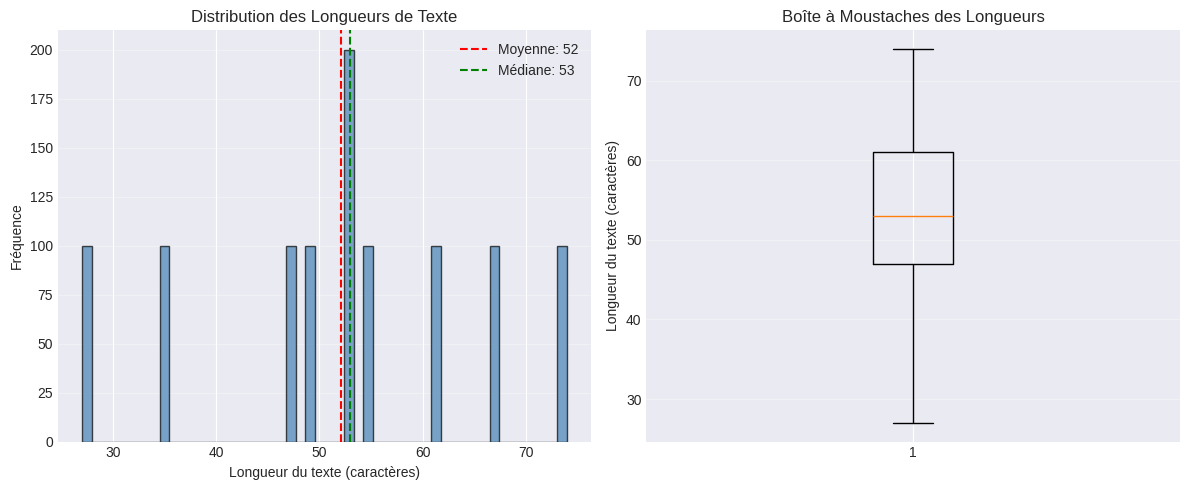


Statistiques de longueur :
  Moyenne: 52.1
  Médiane: 53.0
  Écart-type: 13.2
  Min: 27
  Max: 74
  25e percentile: 47
  75e percentile: 61


In [13]:
# Calculer les longueurs
lengths = [len(text) for text in texts]

# Créer l'histogramme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(lengths, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Longueur du texte (caractères)')
plt.ylabel('Fréquence')
plt.title('Distribution des Longueurs de Texte')
plt.axvline(np.mean(lengths), color='red', linestyle='--', 
            label=f'Moyenne: {np.mean(lengths):.0f}')
plt.axvline(np.median(lengths), color='green', linestyle='--', 
            label=f'Médiane: {np.median(lengths):.0f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(lengths, vert=True)
plt.ylabel('Longueur du texte (caractères)')
plt.title('Boîte à Moustaches des Longueurs')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques de longueur
print(f"\nStatistiques de longueur :")
print(f"  Moyenne: {np.mean(lengths):.1f}")
print(f"  Médiane: {np.median(lengths):.1f}")
print(f"  Écart-type: {np.std(lengths):.1f}")
print(f"  Min: {np.min(lengths)}")
print(f"  Max: {np.max(lengths)}")
print(f"  25e percentile: {np.percentile(lengths, 25):.0f}")
print(f"  75e percentile: {np.percentile(lengths, 75):.0f}")

## 8. Analyse de la Loi de Zipf

La **loi de Zipf** stipule que dans un corpus de langage naturel, la fréquence d'un mot est inversement proportionnelle à son rang.

Mathématiquement : $f(r) \propto \frac{1}{r^\alpha}$

où $f(r)$ est la fréquence du mot de rang $r$, et $\alpha \approx 1$ pour le langage naturel.

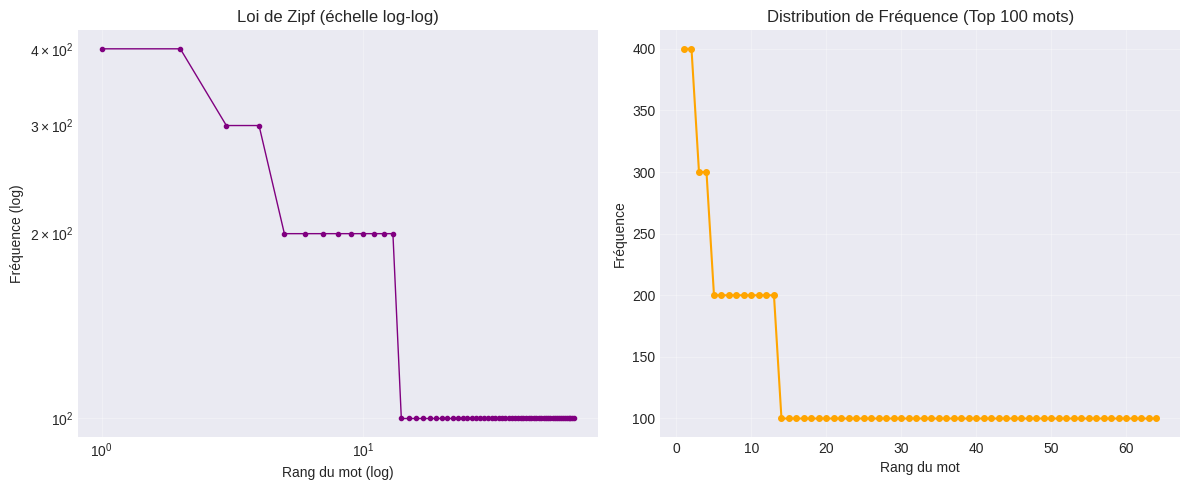


📊 Observation : La distribution suit approximativement la loi de Zipf,
   caractéristique du langage naturel.


In [11]:
# Extraire les fréquences triées
word_frequencies = sorted(stats['word_freq'].values(), reverse=True)
ranks = np.arange(1, len(word_frequencies) + 1)

# Visualiser la loi de Zipf
plt.figure(figsize=(12, 5))

# Échelle log-log
plt.subplot(1, 2, 1)
plt.loglog(ranks, word_frequencies, 'o-', markersize=3, linewidth=1, color='purple')
plt.xlabel('Rang du mot (log)')
plt.ylabel('Fréquence (log)')
plt.title('Loi de Zipf (échelle log-log)')
plt.grid(True, alpha=0.3)

# Échelle linéaire (top 100)
plt.subplot(1, 2, 2)
plt.plot(ranks[:100], word_frequencies[:100], 'o-', markersize=4, linewidth=1.5, color='orange')
plt.xlabel('Rang du mot')
plt.ylabel('Fréquence')
plt.title('Distribution de Fréquence (Top 100 mots)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Observation : La distribution suit approximativement la loi de Zipf,")
print("   caractéristique du langage naturel.")

## 9. Sauvegarde des Informations

Sauvegardons les statistiques pour référence future :

In [15]:
import json

# Préparer les statistiques pour la sauvegarde
stats_to_save = {
    'num_texts': stats['num_texts'],
    'total_chars': stats['total_chars'],
    'avg_length': stats['avg_length'],
    'min_length': stats['min_length'],
    'max_length': stats['max_length'],
    'vocab_size': stats['vocab_size'],
    'word_count': stats['word_count'],
    'unique_words': stats['unique_words'],
    'top_20_words': list(stats['word_freq'].items())[:20]
}

# Sauvegarder
output_path = '../../data/processed/corpus_statistics.json'
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(stats_to_save, f, ensure_ascii=False, indent=2)

print(f"✓ Statistiques sauvegardées dans {output_path}")

✓ Statistiques sauvegardées dans ../../data/processed/corpus_statistics.json


## 10. Résumé et Prochaines Étapes

### Ce que nous avons accompli :

✅ Chargé un corpus français (Wikipedia-fr ou échantillon)
✅ Analysé les statistiques du corpus
✅ Visualisé les distributions de caractères et de mots
✅ Vérifié la loi de Zipf
✅ Préparé les données pour la tokenisation

### Prochaines étapes :

Dans le prochain notebook (`03_bpe_tokenization.ipynb`), nous allons :
1. Implémenter l'algorithme BPE (Byte Pair Encoding) from scratch
2. Construire un vocabulaire de sous-mots
3. Tokeniser notre corpus français
4. Créer les mappings token ↔ ID

### Points clés à retenir :

- Un corpus de qualité est essentiel pour l'entraînement
- Les statistiques nous aident à comprendre les données
- La loi de Zipf est une propriété universelle du langage naturel
- Le prétraitement doit préserver les caractéristiques linguistiques importantes

## 📝 Exercices (Optionnel)

1. **Modifier le prétraitement** : Essayez de charger le corpus avec `lowercase=True` et observez l'impact sur la taille du vocabulaire.

2. **Analyser les bigrammes** : Calculez les paires de mots les plus fréquentes dans le corpus.

3. **Comparer les sources** : Si vous avez accès à plusieurs sources (Wikipedia, Gutenberg), comparez leurs statistiques.

4. **Filtrage avancé** : Implémentez un filtre pour ne garder que les phrases contenant au moins 5 mots.